# DLCV Assignment 2


<b>Name:</b>  Raja Sekhar M <br>
<b>SR No:</b> 6000014806

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import sys
sys.path.append('/kaggle/input/dlcv-a2')

import engine
from model import ViT
#from utils import plot_learning_curves, plot_learning_curves_vs_hparam
import utils

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [2]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)
#classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


Files already downloaded and verified


## Experiment 1

Implementing ViT and training it on CIFAR10 dataset.

In [3]:
model = ViT(
    img_size=32,
    patch_size=4,
    num_classes=10,
    num_transformer_layers=6,
    embedding_dim=64,
    num_heads=4,
    mlp_size=128
)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
loss_fn = torch.nn.CrossEntropyLoss()
results = engine.train(model=model,
             train_dataloader=trainloader,
             test_dataloader=testloader,
             optimizer=optimizer,
             loss_fn=loss_fn,
             device=device,
             epochs=10)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:  1 | train_loss: 1.8679 | train_acc: 0.3142 | test_loss: 1.6172 | test_acc: 0.4189


Epoch:  2 | train_loss: 1.5924 | train_acc: 0.4264 | test_loss: 1.5222 | test_acc: 0.4522


Epoch:  3 | train_loss: 1.4795 | train_acc: 0.4682 | test_loss: 1.3803 | test_acc: 0.5044


Epoch:  4 | train_loss: 1.4014 | train_acc: 0.4950 | test_loss: 1.3311 | test_acc: 0.5234


Epoch:  5 | train_loss: 1.3342 | train_acc: 0.5194 | test_loss: 1.2839 | test_acc: 0.5376


Epoch:  6 | train_loss: 1.2796 | train_acc: 0.5413 | test_loss: 1.2527 | test_acc: 0.5469


Epoch:  7 | train_loss: 1.2346 | train_acc: 0.5576 | test_loss: 1.2303 | test_acc: 0.5561


Epoch:  8 | train_loss: 1.1961 | train_acc: 0.5720 | test_loss: 1.2109 | test_acc: 0.5629


Epoch:  9 | train_loss: 1.1593 | train_acc: 0.5854 | test_loss: 1.1692 | test_acc: 0.5800


Epoch: 10 | train_loss: 1.1254 | train_acc: 0.5979 | test_loss: 1.1650 | test_acc: 0.5843


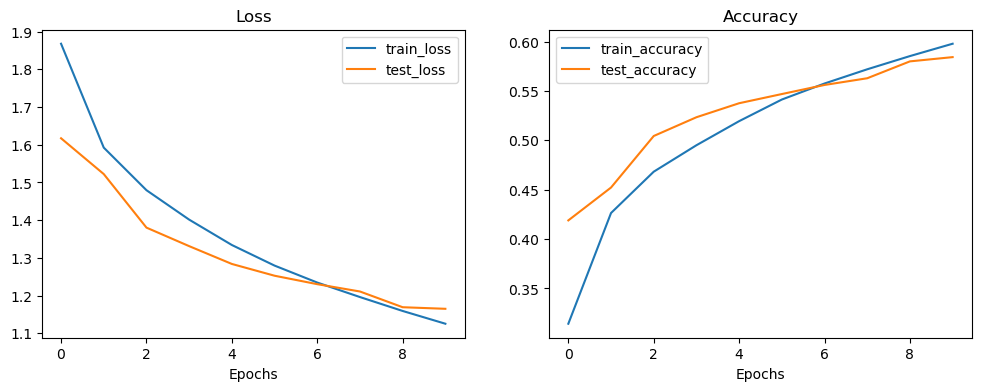

In [4]:
utils.plot_learning_curves(results)

In [5]:
torch.save(model.state_dict(), 'vit_exp1.pth')

## Experiment 2

Training the model at different data sizes 5%, 10%, 25%, 50% and 100% of the 
training dataset.

In [6]:
import torch

trainset_5percent = torch.utils.data.Subset(trainset, range(int(0.05 * len(trainset))))
trainset_10percent = torch.utils.data.Subset(trainset, range(int(0.10 * len(trainset))))
trainset_25percent = torch.utils.data.Subset(trainset, range(int(0.25 * len(trainset))))
trainset_50percent = torch.utils.data.Subset(trainset, range(int(0.50 * len(trainset))))


trainloader_5percent = torch.utils.data.DataLoader(trainset_5percent, batch_size=4, shuffle=True, num_workers=2)
trainloader_10percent = torch.utils.data.DataLoader(trainset_10percent, batch_size=4, shuffle=True, num_workers=2)
trainloader_25percent = torch.utils.data.DataLoader(trainset_25percent, batch_size=4, shuffle=True, num_workers=2)
trainloader_50percent = torch.utils.data.DataLoader(trainset_50percent, batch_size=4, shuffle=True, num_workers=2)

In [7]:
results_vs_datasize = {'5%_data': None, '10%_data': None, '25%_data': None, '50%_data': None, '100%_data': None}

data_sizes = ['5%_data', '10%_data', '25%_data', '50%_data', '100%_data']
trainloaders = [trainloader_5percent, trainloader_10percent, trainloader_25percent, trainloader_50percent, trainloader]

loss_fn = torch.nn.CrossEntropyLoss()

for i in range(len(data_sizes)):
    data_size = data_sizes[i]
    trainloader = trainloaders[i]
    model = ViT(
        img_size=32,
        patch_size=4,
        num_classes=10,
        num_transformer_layers=6,
        embedding_dim=64,
        num_heads=4,
        mlp_size=128
    ).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
    results = engine.train(model=model,
                 train_dataloader=trainloader,
                 test_dataloader=testloader,
                 optimizer=optimizer,
                 loss_fn=loss_fn,
                 device=device,
                 epochs=10)
    results_vs_datasize[data_size] = results


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:  1 | train_loss: 2.2145 | train_acc: 0.1616 | test_loss: 2.1439 | test_acc: 0.1827


Epoch:  2 | train_loss: 2.1363 | train_acc: 0.1920 | test_loss: 2.0954 | test_acc: 0.1909


Epoch:  3 | train_loss: 2.0940 | train_acc: 0.2140 | test_loss: 2.0373 | test_acc: 0.2393


Epoch:  4 | train_loss: 2.0148 | train_acc: 0.2436 | test_loss: 1.9427 | test_acc: 0.2905


Epoch:  5 | train_loss: 1.9338 | train_acc: 0.2900 | test_loss: 1.9069 | test_acc: 0.3017


Epoch:  6 | train_loss: 1.8815 | train_acc: 0.3140 | test_loss: 1.8388 | test_acc: 0.3252


Epoch:  7 | train_loss: 1.8132 | train_acc: 0.3452 | test_loss: 1.8688 | test_acc: 0.3314


Epoch:  8 | train_loss: 1.7949 | train_acc: 0.3468 | test_loss: 1.8019 | test_acc: 0.3467


Epoch:  9 | train_loss: 1.7401 | train_acc: 0.3684 | test_loss: 1.7964 | test_acc: 0.3482


Epoch: 10 | train_loss: 1.7075 | train_acc: 0.3824 | test_loss: 1.7224 | test_acc: 0.3752


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:  1 | train_loss: 2.1876 | train_acc: 0.1742 | test_loss: 2.1198 | test_acc: 0.2109


Epoch:  2 | train_loss: 2.0324 | train_acc: 0.2534 | test_loss: 1.9543 | test_acc: 0.2716


Epoch:  3 | train_loss: 1.9056 | train_acc: 0.3004 | test_loss: 1.8366 | test_acc: 0.3347


Epoch:  4 | train_loss: 1.8439 | train_acc: 0.3240 | test_loss: 1.7772 | test_acc: 0.3519


Epoch:  5 | train_loss: 1.7811 | train_acc: 0.3486 | test_loss: 1.7759 | test_acc: 0.3558


Epoch:  6 | train_loss: 1.7259 | train_acc: 0.3680 | test_loss: 1.7711 | test_acc: 0.3649


Epoch:  7 | train_loss: 1.6773 | train_acc: 0.3950 | test_loss: 1.6546 | test_acc: 0.4036


Epoch:  8 | train_loss: 1.6289 | train_acc: 0.4198 | test_loss: 1.7125 | test_acc: 0.3832


Epoch:  9 | train_loss: 1.5975 | train_acc: 0.4220 | test_loss: 1.6159 | test_acc: 0.4229


Epoch: 10 | train_loss: 1.5501 | train_acc: 0.4416 | test_loss: 1.6192 | test_acc: 0.4195


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:  1 | train_loss: 2.0961 | train_acc: 0.2083 | test_loss: 1.9230 | test_acc: 0.2944


Epoch:  2 | train_loss: 1.8888 | train_acc: 0.3065 | test_loss: 1.7970 | test_acc: 0.3497


Epoch:  3 | train_loss: 1.7874 | train_acc: 0.3515 | test_loss: 1.6652 | test_acc: 0.4034


Epoch:  4 | train_loss: 1.6859 | train_acc: 0.3887 | test_loss: 1.5995 | test_acc: 0.4281


Epoch:  5 | train_loss: 1.6123 | train_acc: 0.4151 | test_loss: 1.5470 | test_acc: 0.4449


Epoch:  6 | train_loss: 1.5651 | train_acc: 0.4324 | test_loss: 1.5608 | test_acc: 0.4367


Epoch:  7 | train_loss: 1.5115 | train_acc: 0.4498 | test_loss: 1.5243 | test_acc: 0.4521


Epoch:  8 | train_loss: 1.4806 | train_acc: 0.4660 | test_loss: 1.5018 | test_acc: 0.4553


Epoch:  9 | train_loss: 1.4414 | train_acc: 0.4821 | test_loss: 1.4792 | test_acc: 0.4711


Epoch: 10 | train_loss: 1.4094 | train_acc: 0.4948 | test_loss: 1.4507 | test_acc: 0.4825


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:  1 | train_loss: 1.9896 | train_acc: 0.2618 | test_loss: 1.8017 | test_acc: 0.3545


Epoch:  2 | train_loss: 1.7431 | train_acc: 0.3666 | test_loss: 1.6557 | test_acc: 0.4050


Epoch:  3 | train_loss: 1.6115 | train_acc: 0.4223 | test_loss: 1.5158 | test_acc: 0.4578


Epoch:  4 | train_loss: 1.5314 | train_acc: 0.4480 | test_loss: 1.4527 | test_acc: 0.4714


Epoch:  5 | train_loss: 1.4691 | train_acc: 0.4724 | test_loss: 1.4174 | test_acc: 0.4932


Epoch:  6 | train_loss: 1.4233 | train_acc: 0.4888 | test_loss: 1.3847 | test_acc: 0.4985


Epoch:  7 | train_loss: 1.3848 | train_acc: 0.5003 | test_loss: 1.4077 | test_acc: 0.5002


Epoch:  8 | train_loss: 1.3413 | train_acc: 0.5124 | test_loss: 1.3635 | test_acc: 0.5136


Epoch:  9 | train_loss: 1.3046 | train_acc: 0.5292 | test_loss: 1.3720 | test_acc: 0.5124


Epoch: 10 | train_loss: 1.2633 | train_acc: 0.5458 | test_loss: 1.3352 | test_acc: 0.5214


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:  1 | train_loss: 1.8687 | train_acc: 0.3162 | test_loss: 1.6403 | test_acc: 0.4079


Epoch:  2 | train_loss: 1.5865 | train_acc: 0.4264 | test_loss: 1.5237 | test_acc: 0.4510


Epoch:  3 | train_loss: 1.4783 | train_acc: 0.4667 | test_loss: 1.3726 | test_acc: 0.5027


Epoch:  4 | train_loss: 1.3952 | train_acc: 0.4973 | test_loss: 1.3784 | test_acc: 0.5055


Epoch:  5 | train_loss: 1.3345 | train_acc: 0.5179 | test_loss: 1.2817 | test_acc: 0.5360


Epoch:  6 | train_loss: 1.2809 | train_acc: 0.5376 | test_loss: 1.2512 | test_acc: 0.5529


Epoch:  7 | train_loss: 1.2336 | train_acc: 0.5560 | test_loss: 1.2375 | test_acc: 0.5589


Epoch:  8 | train_loss: 1.1953 | train_acc: 0.5694 | test_loss: 1.2398 | test_acc: 0.5472


Epoch:  9 | train_loss: 1.1571 | train_acc: 0.5831 | test_loss: 1.1994 | test_acc: 0.5701


Epoch: 10 | train_loss: 1.1241 | train_acc: 0.5971 | test_loss: 1.1494 | test_acc: 0.5859


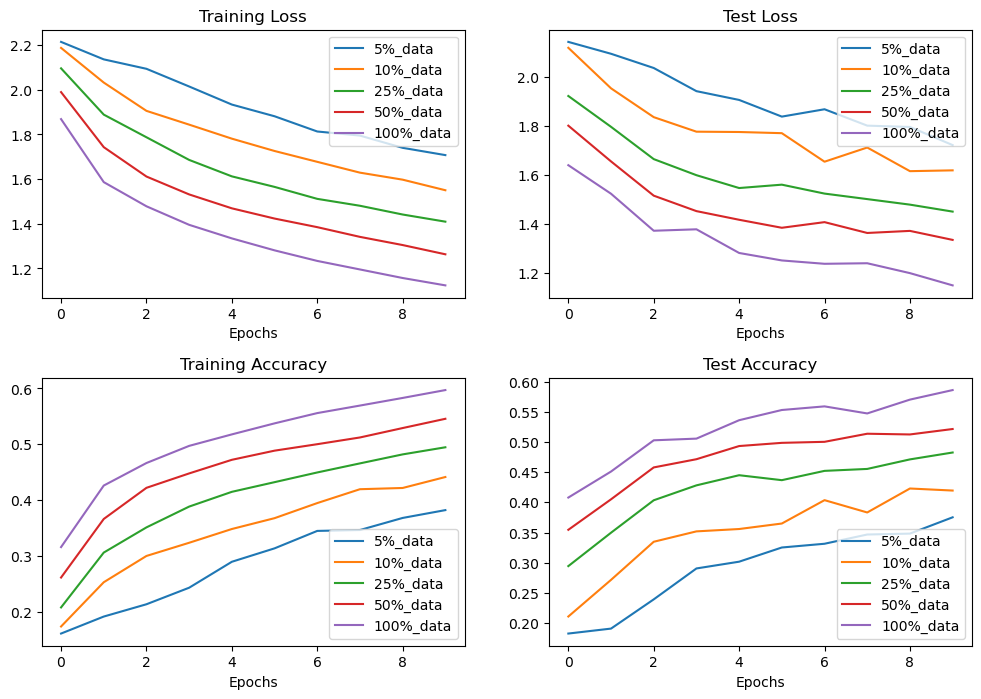

In [8]:
utils.plot_learning_curves_vs_hparam(results_vs_datasize)

## Experiment 3

Training the model with different patch sizes - 4x4, 8x8, and 16x16.

In [9]:
results_vs_patch_size = {'p_size=4': None, 'p_size=8': None, 'p_size=16': None}

loss_fn = torch.nn.CrossEntropyLoss()

for patch_size in ['4', '8', '16']:
    model = ViT(
        img_size=32,
        patch_size=int(patch_size),
        num_classes=10,
        num_transformer_layers=6,
        embedding_dim=64,
        num_heads=4,
        mlp_size=128
    ).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
    results = engine.train(model=model,
                 train_dataloader=trainloader,
                 test_dataloader=testloader,
                 optimizer=optimizer,
                 loss_fn=loss_fn,
                 device=device,
                 epochs=10)
    results_vs_patch_size[f'p_size={patch_size}'] = results

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:  1 | train_loss: 1.8532 | train_acc: 0.3230 | test_loss: 1.6217 | test_acc: 0.4071


Epoch:  2 | train_loss: 1.5760 | train_acc: 0.4318 | test_loss: 1.4337 | test_acc: 0.4882


Epoch:  3 | train_loss: 1.4664 | train_acc: 0.4711 | test_loss: 1.3729 | test_acc: 0.5094


Epoch:  4 | train_loss: 1.3912 | train_acc: 0.4979 | test_loss: 1.3147 | test_acc: 0.5290


Epoch:  5 | train_loss: 1.3274 | train_acc: 0.5232 | test_loss: 1.2610 | test_acc: 0.5430


Epoch:  6 | train_loss: 1.2744 | train_acc: 0.5394 | test_loss: 1.2518 | test_acc: 0.5489


Epoch:  7 | train_loss: 1.2304 | train_acc: 0.5564 | test_loss: 1.2161 | test_acc: 0.5624


Epoch:  8 | train_loss: 1.1919 | train_acc: 0.5714 | test_loss: 1.2098 | test_acc: 0.5658


Epoch:  9 | train_loss: 1.1513 | train_acc: 0.5866 | test_loss: 1.2005 | test_acc: 0.5695


Epoch: 10 | train_loss: 1.1196 | train_acc: 0.5974 | test_loss: 1.1825 | test_acc: 0.5769


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:  1 | train_loss: 1.7776 | train_acc: 0.3531 | test_loss: 1.5308 | test_acc: 0.4465


Epoch:  2 | train_loss: 1.5084 | train_acc: 0.4587 | test_loss: 1.4235 | test_acc: 0.4855


Epoch:  3 | train_loss: 1.4055 | train_acc: 0.4928 | test_loss: 1.3479 | test_acc: 0.5171


Epoch:  4 | train_loss: 1.3398 | train_acc: 0.5184 | test_loss: 1.2919 | test_acc: 0.5332


Epoch:  5 | train_loss: 1.2878 | train_acc: 0.5369 | test_loss: 1.2739 | test_acc: 0.5440


Epoch:  6 | train_loss: 1.2497 | train_acc: 0.5488 | test_loss: 1.2174 | test_acc: 0.5630


Epoch:  7 | train_loss: 1.2079 | train_acc: 0.5688 | test_loss: 1.2517 | test_acc: 0.5547


Epoch:  8 | train_loss: 1.1723 | train_acc: 0.5794 | test_loss: 1.1979 | test_acc: 0.5711


Epoch:  9 | train_loss: 1.1439 | train_acc: 0.5902 | test_loss: 1.1856 | test_acc: 0.5798


Epoch: 10 | train_loss: 1.1165 | train_acc: 0.5974 | test_loss: 1.1886 | test_acc: 0.5815


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:  1 | train_loss: 1.8037 | train_acc: 0.3458 | test_loss: 1.6108 | test_acc: 0.4130


Epoch:  2 | train_loss: 1.5948 | train_acc: 0.4252 | test_loss: 1.5247 | test_acc: 0.4463


Epoch:  3 | train_loss: 1.5064 | train_acc: 0.4570 | test_loss: 1.4375 | test_acc: 0.4811


Epoch:  4 | train_loss: 1.4388 | train_acc: 0.4828 | test_loss: 1.4083 | test_acc: 0.4933


Epoch:  5 | train_loss: 1.3884 | train_acc: 0.5027 | test_loss: 1.3851 | test_acc: 0.5057


Epoch:  6 | train_loss: 1.3471 | train_acc: 0.5181 | test_loss: 1.3456 | test_acc: 0.5109


Epoch:  7 | train_loss: 1.3064 | train_acc: 0.5320 | test_loss: 1.3369 | test_acc: 0.5219


Epoch:  8 | train_loss: 1.2742 | train_acc: 0.5430 | test_loss: 1.3468 | test_acc: 0.5180


Epoch:  9 | train_loss: 1.2420 | train_acc: 0.5564 | test_loss: 1.3000 | test_acc: 0.5296


Epoch: 10 | train_loss: 1.2099 | train_acc: 0.5651 | test_loss: 1.3009 | test_acc: 0.5370


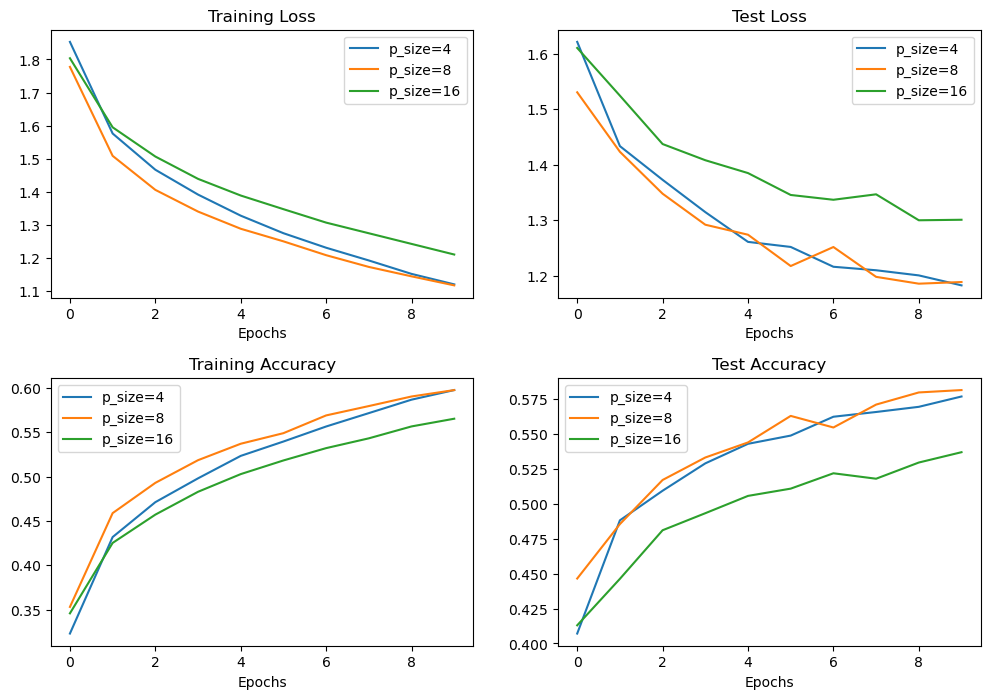

In [10]:
utils.plot_learning_curves_vs_hparam(results_vs_patch_size)

## Experiment 4

Training the model with different number of attention heads - 4, 8, and 12.

In [11]:
results_vs_num_heads = {'n_heads=4': None, 'n_heads=8': None, 'n_heads=12': None}

loss_fn = torch.nn.CrossEntropyLoss()

for num_heads in ['4', '8', '12']:
    model = ViT(
        img_size=32,
        patch_size=4,
        num_classes=10,
        num_transformer_layers=6,
        embedding_dim=96,
        num_heads=int(num_heads),
        mlp_size=128
    ).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
    results = engine.train(model=model,
                 train_dataloader=trainloader,
                 test_dataloader=testloader,
                 optimizer=optimizer,
                 loss_fn=loss_fn,
                 device=device,
                 epochs=10)
    results_vs_num_heads[f'n_heads={num_heads}'] = results

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:  1 | train_loss: 1.8341 | train_acc: 0.3276 | test_loss: 1.6376 | test_acc: 0.3955


Epoch:  2 | train_loss: 1.5729 | train_acc: 0.4295 | test_loss: 1.4461 | test_acc: 0.4776


Epoch:  3 | train_loss: 1.4582 | train_acc: 0.4740 | test_loss: 1.3710 | test_acc: 0.5089


Epoch:  4 | train_loss: 1.3827 | train_acc: 0.5045 | test_loss: 1.3527 | test_acc: 0.5109


Epoch:  5 | train_loss: 1.3262 | train_acc: 0.5219 | test_loss: 1.2816 | test_acc: 0.5406


Epoch:  6 | train_loss: 1.2738 | train_acc: 0.5423 | test_loss: 1.2426 | test_acc: 0.5548


Epoch:  7 | train_loss: 1.2255 | train_acc: 0.5588 | test_loss: 1.2049 | test_acc: 0.5704


Epoch:  8 | train_loss: 1.1870 | train_acc: 0.5712 | test_loss: 1.2053 | test_acc: 0.5635


Epoch:  9 | train_loss: 1.1484 | train_acc: 0.5867 | test_loss: 1.2107 | test_acc: 0.5707


Epoch: 10 | train_loss: 1.1130 | train_acc: 0.5989 | test_loss: 1.1686 | test_acc: 0.5813


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:  1 | train_loss: 1.8139 | train_acc: 0.3368 | test_loss: 1.5289 | test_acc: 0.4506


Epoch:  2 | train_loss: 1.5195 | train_acc: 0.4535 | test_loss: 1.3816 | test_acc: 0.5023


Epoch:  3 | train_loss: 1.4101 | train_acc: 0.4926 | test_loss: 1.3704 | test_acc: 0.5136


Epoch:  4 | train_loss: 1.3299 | train_acc: 0.5220 | test_loss: 1.2917 | test_acc: 0.5315


Epoch:  5 | train_loss: 1.2644 | train_acc: 0.5443 | test_loss: 1.2463 | test_acc: 0.5508


Epoch:  6 | train_loss: 1.2124 | train_acc: 0.5643 | test_loss: 1.2073 | test_acc: 0.5628


Epoch:  7 | train_loss: 1.1644 | train_acc: 0.5789 | test_loss: 1.1685 | test_acc: 0.5823


Epoch:  8 | train_loss: 1.1166 | train_acc: 0.5997 | test_loss: 1.2000 | test_acc: 0.5738


Epoch:  9 | train_loss: 1.0796 | train_acc: 0.6130 | test_loss: 1.1374 | test_acc: 0.5923


Epoch: 10 | train_loss: 1.0422 | train_acc: 0.6260 | test_loss: 1.1274 | test_acc: 0.5982


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:  1 | train_loss: 1.7936 | train_acc: 0.3462 | test_loss: 1.5370 | test_acc: 0.4458


Epoch:  2 | train_loss: 1.5046 | train_acc: 0.4606 | test_loss: 1.3684 | test_acc: 0.5083


Epoch:  3 | train_loss: 1.3823 | train_acc: 0.5024 | test_loss: 1.3279 | test_acc: 0.5207


Epoch:  4 | train_loss: 1.2913 | train_acc: 0.5370 | test_loss: 1.3510 | test_acc: 0.5239


Epoch:  5 | train_loss: 1.2272 | train_acc: 0.5589 | test_loss: 1.2270 | test_acc: 0.5574


Epoch:  6 | train_loss: 1.1744 | train_acc: 0.5789 | test_loss: 1.1959 | test_acc: 0.5717


Epoch:  7 | train_loss: 1.1261 | train_acc: 0.5963 | test_loss: 1.1705 | test_acc: 0.5807


Epoch:  8 | train_loss: 1.0907 | train_acc: 0.6089 | test_loss: 1.1384 | test_acc: 0.5978


Epoch:  9 | train_loss: 1.0518 | train_acc: 0.6243 | test_loss: 1.1252 | test_acc: 0.6022


Epoch: 10 | train_loss: 1.0146 | train_acc: 0.6361 | test_loss: 1.1110 | test_acc: 0.6105


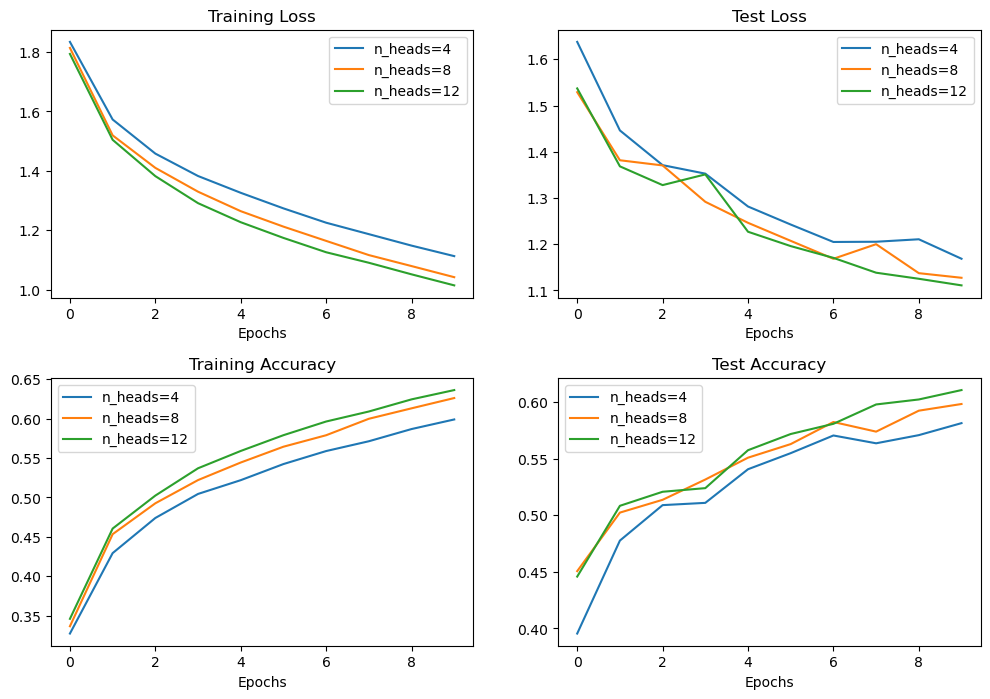

In [12]:
utils.plot_learning_curves_vs_hparam(results_vs_num_heads)

## Experiment 5

Performing classification using CLS token from different transformer layers.

In [13]:
import random

trained_model = ViT(
    img_size=32,
    patch_size=4,
    num_classes=10,
    num_transformer_layers=6,
    embedding_dim=64,
    num_heads=4,
    mlp_size=128
).to(device)
device = "cuda" if torch.cuda.is_available() else "cpu"
if device=='cuda':
    trained_model.load_state_dict(torch.load('vit_exp1.pth'))
elif device=='cpu':
    trained_model.load_state_dict(torch.load('vit_exp1.pth',
                                            map_location=torch.device('cpu')
                                            )
                                  )

def classify_with_CLS_l(model, img, l):
    '''Classifies an image using the CLS token of the l-th transformer layer'''
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)
    model.eval()
    model(img.to(device))
    x = model.transformer_encoder[l].CLS
    out = model.classifier(x)
    out_class = torch.argmax(out).item()
    return out_class

samples = torch.utils.data.Subset(testset, random.sample(range(len(testset)), 10))
predictions_vs_layers = {}
for i in range(len(samples)):
    img = samples[i][0].unsqueeze(0)
    gt = samples[i][1]
    #print('Ground truth: ', gt)
    preds_for_img = []
    for l in range(6):
        out_class = classify_with_CLS_l(trained_model, img, l)
        #print(f'using layer {l} CLS token: ',out_class)
        preds_for_img.append(out_class)
    predictions_vs_layers[i] = preds_for_img

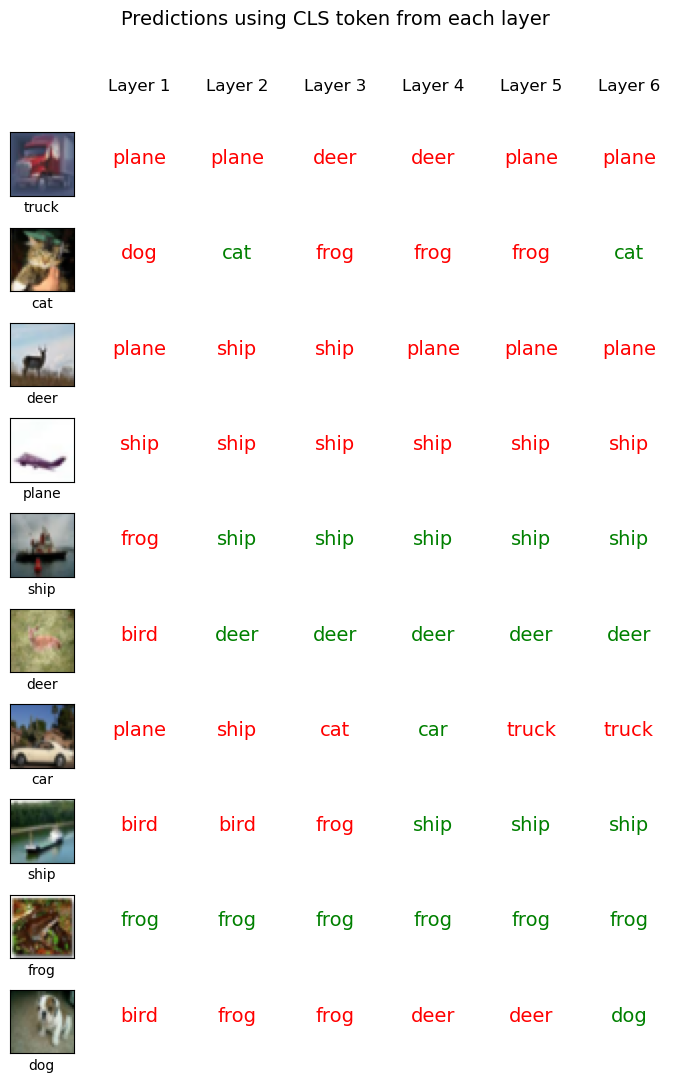

In [14]:
utils.plot_predictions_vs_layers(samples, predictions_vs_layers)

## Experiment 6

Two randomly chosen test images per class (total of 20 images) are classified and attention maps are visualized.

In [15]:
from torchinfo import summary
import matplotlib.pyplot as plt
import numpy as np

In [16]:
trained_model = ViT(
    img_size=32,
    patch_size=4,
    num_classes=10,
    num_transformer_layers=6,
    embedding_dim=64,
    num_heads=4,
    mlp_size=128
)

if device=='cuda':
    trained_model.load_state_dict(torch.load('vit_exp1.pth'))
elif device=='cpu':
    trained_model.load_state_dict(torch.load('vit_exp1.pth',
                                            map_location=torch.device('cpu')
                                            )
                                  )

In [17]:
summary(model=trained_model,
         input_size=(1, 3, 32, 32), # (batch_size, color_channels, height, width)
         col_names=["input_size"], # uncomment for smaller output
         #col_names=["input_size", "output_size", "num_params", "trainable"],
         col_width=20,
         row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape
ViT (ViT)                                                    [1, 3, 32, 32]
├─PatchEmbedding (patch_embedding)                           [1, 3, 32, 32]
│    └─Conv2d (patcher)                                      [1, 3, 32, 32]
│    └─Flatten (flatten)                                     [1, 64, 8, 8]
├─Dropout (embedding_dropout)                                [1, 65, 64]
├─Sequential (transformer_encoder)                           [1, 65, 64]
│    └─TransformerEncoderBlock (0)                           [1, 65, 64]
│    │    └─MultiheadSelfAttentionBlock (msa_block)          [1, 65, 64]
│    │    └─MLPBlock (mlp_block)                             [1, 65, 64]
│    └─TransformerEncoderBlock (1)                           [1, 65, 64]
│    │    └─MultiheadSelfAttentionBlock (msa_block)          [1, 65, 64]
│    │    └─MLPBlock (mlp_block)                             [1, 65, 64]
│    └─TransformerEncoderBlock (2)      

10


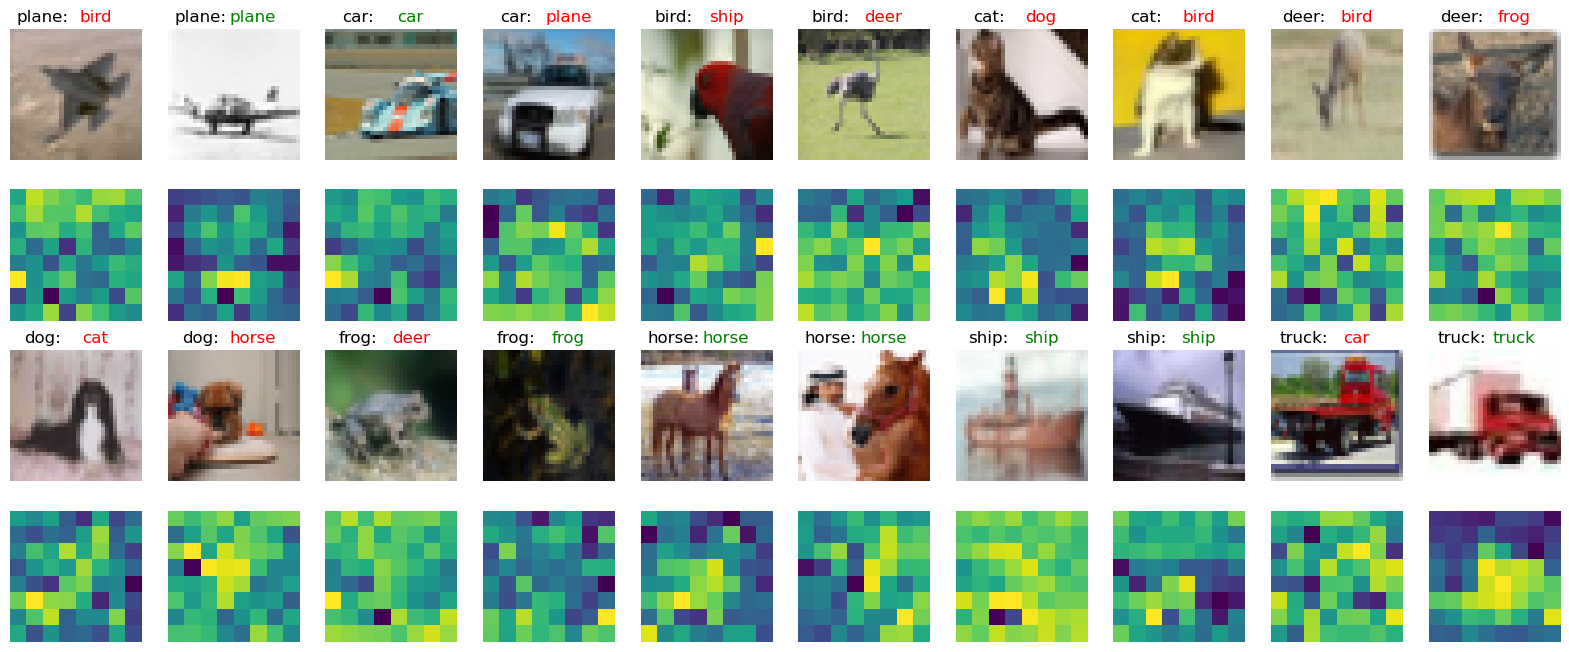

In [18]:
import numpy as np
import matplotlib.pyplot as plt

samples = utils.get_2_samples_per_class(testset)
N = len(samples)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
trained_model.to(device)
fig = plt.figure(figsize=(20,8))
rows = 4
cols = N//2
print(cols)
for i in range(N):
    img, gt_lbl = samples[i]
    attentions, pred_lbl = utils.get_attentions(trained_model, img)
    
    rollout = utils.attention_rollout(attentions)
    cls_attn = rollout[0, 1:, 0]
    cls_attn_map = 1-cls_attn.reshape((8,8))
    
    color = 'green' if gt_lbl==pred_lbl else 'red'
    if i< cols:
        img_pos = i+1
        map_pos = i+1+cols
    else:
        img_pos = i+1+cols
        map_pos =i+1+2*cols
    plt.subplot(rows,cols,img_pos)
    plt.imshow((img.to('cpu').permute(1,2,0).numpy()*255).astype(np.uint8))
    plt.text(0.25, 1.05, f'{classes[gt_lbl]}:', color="black", fontsize=12, ha="center", transform=plt.gca().transAxes)
    plt.text(0.65, 1.05, classes[pred_lbl], color=color, fontsize=12, ha="center", transform=plt.gca().transAxes)
    #plt.title(f'{classes[pred_lbl]}', color=color)
    plt.axis(False)
    plt.subplot(rows,cols,map_pos)
    plt.imshow(cls_attn_map.to('cpu').detach().numpy())
    plt.axis(False)